 <center><font size=3><b> Interest Rate Swap & Treasury Yields Exploration</b> </font></center>
 
 <center>Zhiwei Raphael Hu</center>

Sources of data:


US Swap rates: Barchart.com

US Treasury Rates: Nasdaq Quandl API, datebase: global yield curve

### Datasets Prep

In [1]:
# Interest Rate Swap & Treasury Yields
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
import seaborn as sns
sns.set_theme(style='darkgrid')
# Now to obtain the dataset first
import quandl
quandl.ApiConfig.api_key = 'LFxwzaCbdfby5FExQSRc'

In [80]:
#import swap data
tenor_list = [1,2,3,5,7,10,15,30]

def swap_import(tenor_list):
    df = pd.DataFrame()
    for tenor in tenor_list:
        file_name = "USSWAP"+str(tenor)+'Y'
        df_temp = pd.read_csv(file_name+'.csv',index_col=0,header=0,usecols=['Time','Last'],parse_dates=["Time"])[:-1][::-1]
        df_temp.rename(columns={'Last':str(tenor)+"Y"},inplace=True)
        df = pd.concat([df,df_temp],axis=1)
    df = df.dropna() # only take dates where all curve has the datapoint
    return df

df_swap = swap_import(tenor_list)
df_swap.index = pd.to_datetime(df_swap.index,format='%m/%d/%Y')

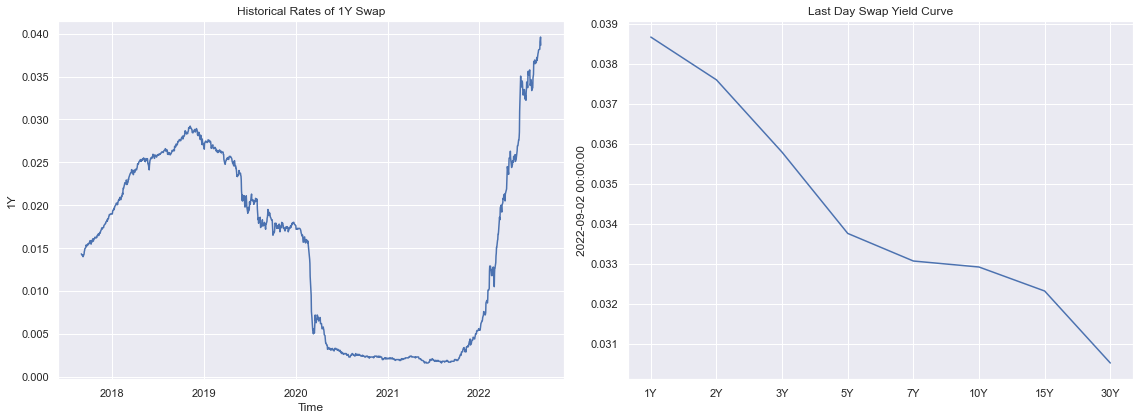

In [82]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.lineplot(data=df_swap['1Y'],ax=ax[0]).set_title('Historical Rates of 1Y Swap')
sns.lineplot(data=df_swap.iloc[-1,:],ax=ax[1]).set_title('Last Day Swap Yield Curve')
plt.tight_layout()

In [66]:
# first-time user, import the tenors
tenor_list = ['1M','3M','6M','1Y','2Y','3Y','5Y','7Y','10Y','30Y']

def get_YC_USA(tenor_list):
    df = pd.DataFrame()
    for tenor in tenor_list:
        yield_name = 'YC/USA'+tenor
        df_temp = quandl.get(yield_name, start_date='2017-09-01', end_date='2022-09-01')
        df_temp.rename(columns={'Rate':tenor},inplace=True)
        df = pd.concat([df,df_temp],axis=1)
    return df
df_yc = get_YC_USA(tenor_list)
# sanity check if any null value
df_yc.isna().any()
# save to pickle
df_yc.to_pickle('./US Treasury Rates.pkl')

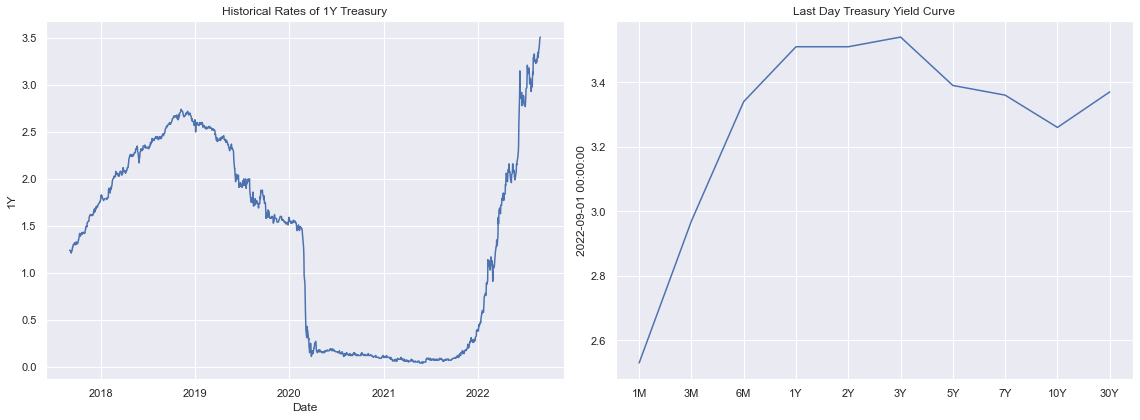

In [70]:
# now directly read from the pickle file
df_treasury = pd.read_pickle('US Treasury Rates.pkl')
fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.lineplot(data=df_treasury['1Y'],ax=ax[0]).set_title('Historical Rates of 1Y Treasury')
sns.lineplot(data=df_treasury.iloc[-1,:],ax=ax[1]).set_title('Last Day Treasury Yield Curve')
plt.tight_layout()

In [83]:
df_treasury

,1M,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,30Y
Date,,,,,,,,,,
2017-09-01,0.96,1.02,1.10,1.24,1.35,1.46,1.73,1.99,2.16,2.77
2017-09-05,1.30,1.03,1.13,1.23,1.30,1.40,1.65,1.90,2.07,2.69
2017-09-06,1.04,1.07,1.17,1.24,1.30,1.42,1.69,1.93,2.10,2.72
2017-09-07,0.98,1.05,1.15,1.21,1.27,1.38,1.63,1.88,2.05,2.66
2017-09-08,0.96,1.04,1.14,1.22,1.27,1.39,1.64,1.89,2.06,2.67
...,...,...,...,...,...,...,...,...,...,...
2022-08-26,2.39,2.89,3.26,3.36,3.37,3.40,3.20,3.14,3.04,3.21
2022-08-29,2.45,2.97,3.32,3.43,3.42,3.45,3.27,3.21,3.12,3.25
2022-08-30,2.43,2.97,3.31,3.48,3.46,3.47,3.27,3.22,3.11,3.23


In [222]:
df_swap

,1Y,2Y,3Y,5Y,7Y,10Y,15Y,30Y
Time,,,,,,,,
2017-09-01,0.01433,0.01554,0.01644,0.01797,0.01949,0.02112,0.02191,0.02428
2017-09-05,0.01415,0.01514,0.01589,0.01718,0.01855,0.02021,0.02101,0.02342
2017-09-06,0.01421,0.01534,0.01613,0.01757,0.01893,0.02060,0.02141,0.02382
2017-09-07,0.01406,0.01504,0.01578,0.01711,0.01849,0.02011,0.02089,0.02324
2017-09-08,0.01400,0.01501,0.01585,0.01721,0.01855,0.02016,0.02094,0.02327
...,...,...,...,...,...,...,...,...
2022-08-29,0.03819,0.03722,0.03533,0.03268,0.03153,0.03112,0.03060,0.02904
2022-08-30,0.03905,0.03815,0.03621,0.03361,0.03250,0.03203,0.03140,0.02950
2022-08-31,0.03927,0.03842,0.03623,0.03381,0.03281,0.03242,0.03181,0.02998


### Re-invent the Swap Curve 
#### Cubic Spline Interpolation

For a whole set of ($x_0$,$y_0$),($x_1$,$y_1$),($x_2$,$y_2$),...,(($x_n$,$y_n$)
We do this piecewise, for each, we have:

$$g_i(x) = a_i(x-x_i)^3 + b_i(x-x_i)^2 + c_i(x-x_i) + d_i$$

natural boundary definition:
$$
S^{''}_1(x_1) = 0;
$$
$$
S^{''}_{n-1}(x_n) = 0;
$$

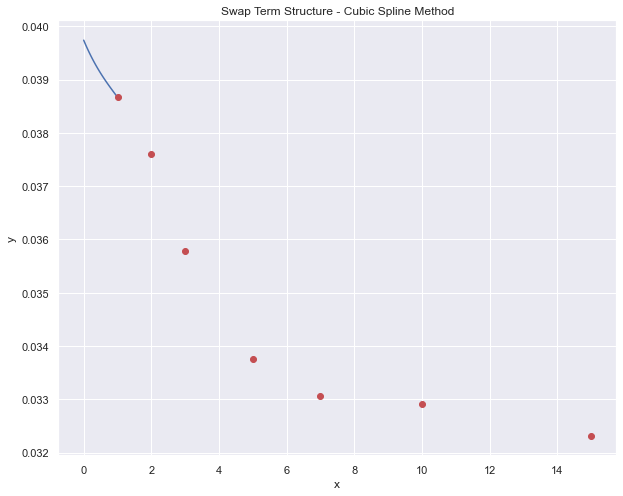

In [196]:
from scipy.interpolate import CubicSpline
x = [1,2,3,5,7,10,15]
y = list(df_swap.iloc[-1,:])[:-1] # the last day swap curve rates 09-01
crv = CubicSpline(x,y,bc_type='natural') # the end-point conditions might be differrent, see "not-a-knot" or "clamped"
x_new = np.linspace(0,1,100)
y_new=crv(x_new)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Swap Term Structure - Cubic Spline Method')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [197]:
# 0901 Swap Curve
print("The 3-Month Swap Rate is {0}% and the 6-Month Swap Rate is {1}%.".format(round(y_new[24]*100,4),round(y_new[49]*100,4)))

The 3-Month Swap Rate is 3.9408% and the 6-Month Swap Rate is 3.9126%.


#### Newton’s Polynomial Interpolation

It assumes:
$$
f(x) = a_0 + a_1(x - x_0) + a_2(x-x_0)(x-x_1)+...+a_n(x-x_0)(x-x_1)...(x-x_n);
$$
And the coefficients are just divided differences that could be calculated by:
$$
f(x_0) = a_0 = y_0;
$$

$$
a_1 = \frac{y_1-y_0}{x_1-x_0};
$$

Define $$f[x_1,x_0] = \frac{y_1-y_0}{x_1-x_0};$$

$$f[x_k,x_{k-1},...,x_1.x_0] = \frac{f[x_k,x_{k-1},...,x_2,x_1]-f[x_{k-1},x_{k-2},...,x_1,x_0]}{x_k-x_0}$$

The 3-Month Swap Rate is 3.7205% and the 6-Month Swap Rate is 3.8046%.


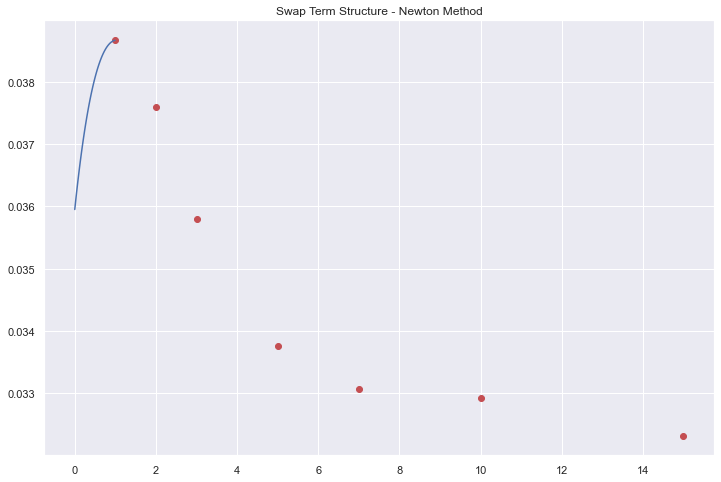

In [210]:
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef # calculate all divided difference - coefficients

def newton_poly(coef, x_data, x):
    # the curve
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x = np.array([1,2,3,5,7,10,15])
y = np.array(list(df_swap.iloc[-1,:][:-1]))
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(0, 1, .01)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)
plt.title('Swap Term Structure - Newton Method')
# 0901 Swap Curve
print("The 3-Month Swap Rate is {0}% and the 6-Month Swap Rate is {1}%.".format(round(y_new[24]*100,4),round(y_new[49]*100,4)))

### Spread Analysis - We Interplote on the Spread Curve Instead
#### Single Day Spread

In [102]:
all_time = df_swap.index

In [142]:
df_spread = pd.DataFrame()
for dt in all_time:
    try:
        df_temp = pd.concat([df_treasury.T[dt]/100,df_swap.T[dt]],axis=1).dropna()
        df_temp.columns=["Treasury","Swap"]
        df_temp[dt] = df_temp["Swap"] - df_temp["Treasury"]
        df_spread = pd.concat([df_spread,df_temp[dt]],axis=1)
    except:
        pass
df_spread = df_spread.T #Transpose
df_spread

,1Y,2Y,3Y,5Y,7Y,10Y,30Y
2017-09-01,0.00193,0.00204,0.00184,0.00067,-0.00041,-0.00048,-0.00342
2017-09-05,0.00185,0.00214,0.00189,0.00068,-0.00045,-0.00049,-0.00348
2017-09-06,0.00181,0.00234,0.00193,0.00067,-0.00037,-0.00040,-0.00338
2017-09-07,0.00196,0.00234,0.00198,0.00081,-0.00031,-0.00039,-0.00336
2017-09-08,0.00180,0.00231,0.00195,0.00081,-0.00035,-0.00044,-0.00343
...,...,...,...,...,...,...,...
2022-08-26,0.00455,0.00351,0.00147,0.00080,0.00024,0.00082,-0.00295
2022-08-29,0.00389,0.00302,0.00083,-0.00002,-0.00057,-0.00008,-0.00346
2022-08-30,0.00425,0.00355,0.00151,0.00091,0.00030,0.00093,-0.00280
2022-08-31,0.00427,0.00392,0.00163,0.00081,0.00031,0.00092,-0.00272


In [143]:
print(len(all_time)) # 1268-1229 = 39 days not overlapping in our datasource

1268


Text(0.5, 1.0, 'Historical 1-3-5-10Y Treasury-Swap Spread')

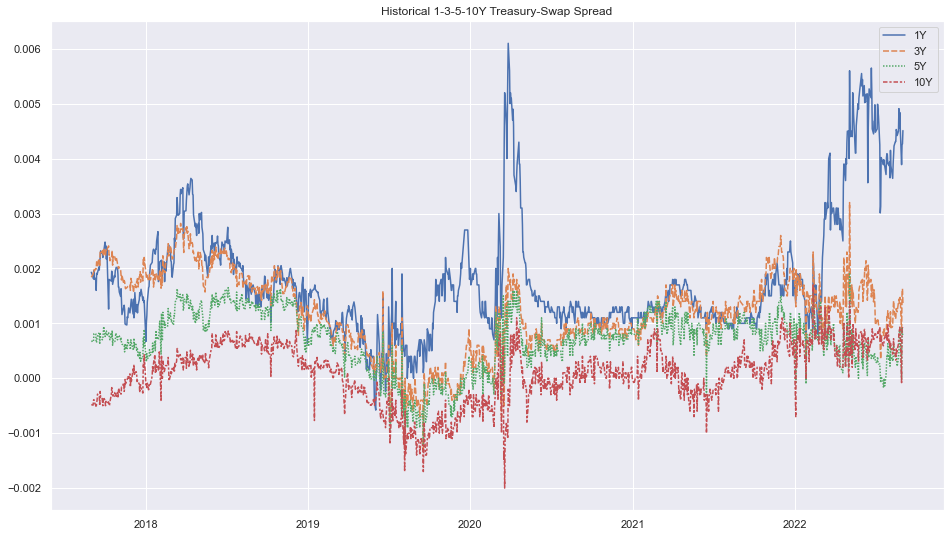

In [144]:
sns.lineplot(data=df_spread[["1Y","3Y","5Y","10Y"]]).set_title('Historical 1-3-5-10Y Treasury-Swap Spread')

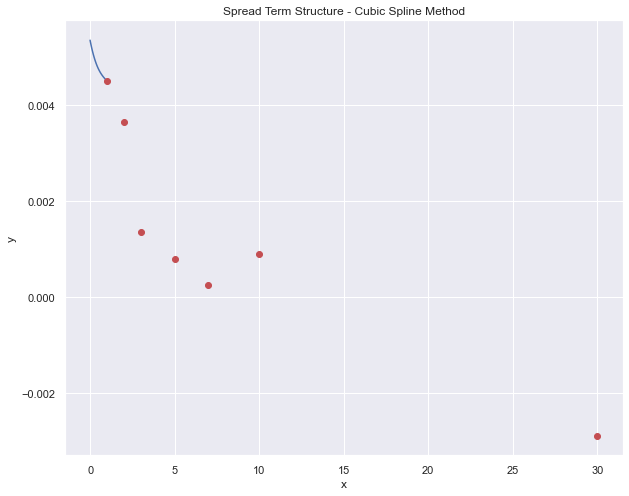

The 3-Month Swap Spread is 50.0093bps and the 6-Month Swap Rate is 47.6095bps.
The 3-Month Swap is 3.4701% and the 6-Month Swap is 3.8161%.


In [218]:
x = [1,2,3,5,7,10,30]
y = list(df_spread.iloc[-1,:])# the last day swap curve rates 09-01
crv = CubicSpline(x,y,bc_type='natural') # the end-point conditions might be differrent, see "not-a-knot" or "clamped"
x_new = np.linspace(0,1,100)
y_new=crv(x_new)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Spread Term Structure - Cubic Spline Method')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("The 3-Month Swap Spread is {0}bps and the 6-Month Swap Rate is {1}bps.".format(round(y_new[24]*10000,4),
                                                                                      round(y_new[49]*10000,4)))
print("The 3-Month Swap is {0}% and the 6-Month Swap is {1}%.".format(round((df_treasury["3M"][-1]/100+y_new[24])*100,4),
                                                                      round((df_treasury["6M"][-1]/100+y_new[49])*100,4)))

#### Average Swap Spreads - 7 Days rolling

In [146]:
df_sprd_rol = pd.DataFrame()
for col in df_spread.columns:
    name = col+" Rolling"
    df_spread[name] = df_spread[col].rolling("7D").mean()
    df_sprd_rol = pd.concat([df_sprd_rol,df_spread[name]],axis=1)
    df_spread.drop(name,axis=1,inplace=True)
df_sprd_rol

,1Y Rolling,2Y Rolling,3Y Rolling,5Y Rolling,7Y Rolling,10Y Rolling,30Y Rolling
2017-09-01,0.001930,0.002040,0.001840,0.000670,-0.000410,-0.000480,-0.003420
2017-09-05,0.001890,0.002090,0.001865,0.000675,-0.000430,-0.000485,-0.003450
2017-09-06,0.001863,0.002173,0.001887,0.000673,-0.000410,-0.000457,-0.003427
2017-09-07,0.001888,0.002215,0.001910,0.000708,-0.000385,-0.000440,-0.003410
2017-09-08,0.001855,0.002282,0.001938,0.000743,-0.000370,-0.000430,-0.003413
...,...,...,...,...,...,...,...
2022-08-26,0.004672,0.003656,0.001426,0.000678,0.000132,0.000816,-0.002966
2022-08-29,0.004550,0.003524,0.001316,0.000602,0.000028,0.000674,-0.003036
2022-08-30,0.004418,0.003444,0.001330,0.000688,0.000076,0.000694,-0.002996
2022-08-31,0.004360,0.003510,0.001382,0.000680,0.000124,0.000704,-0.002960


<AxesSubplot:ylabel='2022-09-01 00:00:00'>

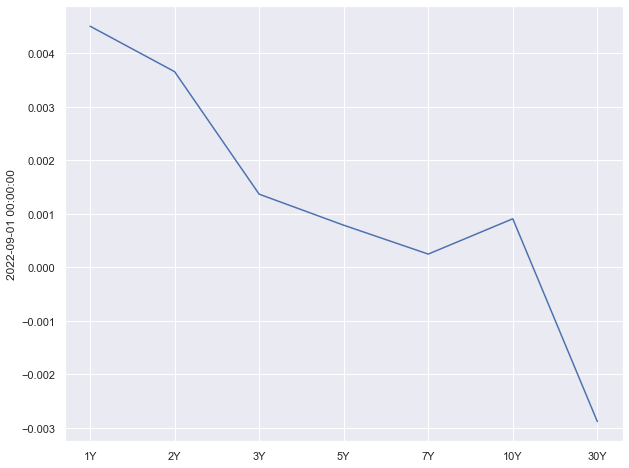

In [221]:
plt.figure(figsize = (10,8))
sns.lineplot(data=df_spread.iloc[-1,:])

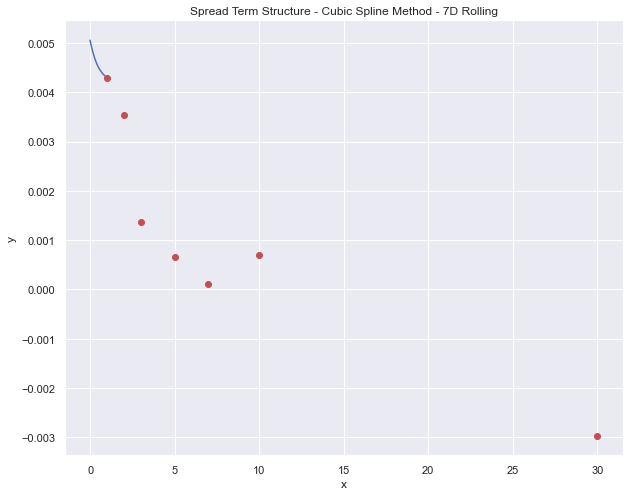

The 3-Month Swap Spread is 47.2402bps and the 6-Month Swap Rate is 45.0722bps.
The 3-Month Swap is 3.4424% and the 6-Month Swap is 3.7907%.


In [220]:
x = [1,2,3,5,7,10,30]
y = list(df_sprd_rol.iloc[-1,:])# the last day swap curve rates 09-01
crv = CubicSpline(x,y,bc_type='natural') # the end-point conditions might be differrent, see "not-a-knot" or "clamped"
x_new = np.linspace(0,1,100)
y_new=crv(x_new)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Spread Term Structure - Cubic Spline Method - 7D Rolling')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("The 3-Month Swap Spread is {0}bps and the 6-Month Swap Rate is {1}bps.".format(round(y_new[24]*10000,4),
                                                                                      round(y_new[49]*10000,4)))
print("The 3-Month Swap is {0}% and the 6-Month Swap is {1}%.".format(round((df_treasury["3M"][-1]/100+y_new[24])*100,4),
                                                                      round((df_treasury["6M"][-1]/100+y_new[49])*100,4)))

### Summary (2022-09-01)

| Method      | 3M | 6M|
| ----------- | ----------- |---------|
| Cubic Spline on Swap Curve      | 3.9408% (T+97bps)       | 3.9126% (T+57bps)|
| Newton Polynomial on Swap Curve  | 3.72% (T+75bps)       |3.80% (T+46bps)|
| Cubic Spline on Swap Spread  | 3.47% (T+50bps)       |3.82% (T+48bps)|
| Cubic Spline on Swap Spread (7D Rolling Ave)  | 3.44% (T+47bps)       |3.79% (T+45bps)|

### Some Further Questions 

* Is swap spread always positive?
* What is BBG's method to price 3M and 6M's swap contract?
* Upper bounds / Lower bounds of 3M and 6M swap pricing?
* Apart from pure technical analysis above, is there some way to decompose the swap spread into some principal components, and price the spread acxording to the changes in those components? - Adopt PCA Analysis.

### References:
1. Moody's Modeling and Forecasting Interest Rate Swap Spreads - PCA Approach to analyze the spreads
https://www.moodysanalytics.com/risk-perspectives-magazine/managing-disruption/principles-and-practices/modeling-and-forecasting-interest-rate-swap-spreads
2. Python Numerical Methods: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.03-Cubic-Spline-Interpolation.html